Custom Matplotlib Thema

In [1]:
import numpy as np
import pandas as pd 
import matplotlib as mpl
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
from cycler import cycler

raw_light_palette = [
    (0, 122, 255), # Blue
    (255, 149, 0), # Orange
    (52, 199, 89), # Green
    (255, 59, 48), # Red
    (175, 82, 222),# Purple
    (255, 45, 85), # Pink
    (88, 86, 214), # Indigo
    (90, 200, 250),# Teal
    (255, 204, 0)  # Yellow
]

raw_dark_palette = [
    (10, 132, 255), # Blue
    (255, 159, 10), # Orange
    (48, 209, 88),  # Green
    (255, 69, 58),  # Red
    (191, 90, 242), # Purple
    (94, 92, 230),  # Indigo
    (255, 55, 95),  # Pink
    (100, 210, 255),# Teal
    (255, 214, 10)  # Yellow
]

raw_gray_light_palette = [
    (142, 142, 147),# Gray
    (174, 174, 178),# Gray (2)
    (199, 199, 204),# Gray (3)
    (209, 209, 214),# Gray (4)
    (229, 229, 234),# Gray (5)
    (242, 242, 247),# Gray (6)
]

raw_gray_dark_palette = [
    (142, 142, 147),# Gray
    (99, 99, 102),  # Gray (2)
    (72, 72, 74),   # Gray (3)
    (58, 58, 60),   # Gray (4)
    (44, 44, 46),   # Gray (5)
    (28, 28, 39),   # Gray (6)
]


light_palette = np.array(raw_light_palette)/255
dark_palette = np.array(raw_dark_palette)/255
gray_light_palette = np.array(raw_gray_light_palette)/255
gray_dark_palette = np.array(raw_gray_dark_palette)/255

Light mode palette
Dark mode palette


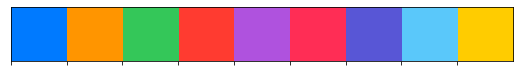

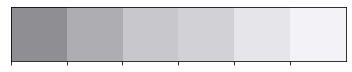

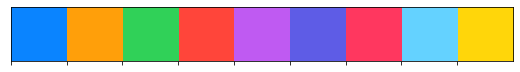

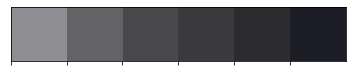

In [3]:
print('Light mode palette')
sns.palplot(light_palette)
sns.palplot(gray_light_palette)

print('Dark mode palette')
sns.palplot(dark_palette)
sns.palplot(gray_dark_palette)

In [4]:
# cmap 수정
mpl.rcParams['axes.prop_cycle'] = cycler('color',dark_palette)

In [5]:
# 전체적인 배경색 수정
mpl.rcParams['figure.facecolor']  = gray_dark_palette[-2]
mpl.rcParams['figure.edgecolor']  = gray_dark_palette[-2]
mpl.rcParams['axes.facecolor'] =  gray_dark_palette[-2]


In [6]:
# 사용되는 텍스트 색상 흰색으로 수정
white_color = gray_light_palette[-2]
mpl.rcParams['text.color'] = white_color
mpl.rcParams['axes.labelcolor'] = white_color
mpl.rcParams['axes.edgecolor'] = white_color
mpl.rcParams['xtick.color'] = white_color
mpl.rcParams['ytick.color'] = white_color

In [7]:
# 해상도 조정
mpl.rcParams['figure.dpi'] = 200

In [8]:
# ax의 우측과 상단 지우기
mpl.rcParams['axes.spines.top'] = False
mpl.rcParams['axes.spines.right'] = False

In [12]:
student = pd.read_csv('data/StudentsPerformance.csv')
iris = pd.read_csv('data/iris.csv')

scatter plot

In [13]:
def score_distribution(f1, f2):
    fig = plt.figure(figsize=(12, 10),dpi=150)

    gs = fig.add_gridspec(5, 6)

    ax = fig.add_subplot(gs[:,:5])
    ax.set_aspect(1)

    for group in sorted(student['race/ethnicity'].unique()):
        student_sub = student[student['race/ethnicity']==group]
        ax.scatter(student_sub[f'{f1} score'], student_sub[f'{f2} score'], 
                   s=20, alpha=0.6, 
                   linewidth=0.5, 
                   label=group
                  )

    sub_axes = [None] * 5
    for idx, group in enumerate(sorted(student['race/ethnicity'].unique())):
        sub_axes[idx] = fig.add_subplot(gs[idx,5], aspect=1)
        sub_axes[idx].scatter(student[student['race/ethnicity']!=group][f'{f1} score'], student[student['race/ethnicity']!=group][f'{f2} score'], 
                              s=5, alpha=0.2, 
                              color= white_color,
                              linewidth=0.7, 
                              label=group,
                              zorder=5
                  )
        sub_axes[idx].scatter(student[student['race/ethnicity']==group][f'{f1} score'], student[student['race/ethnicity']==group][f'{f2} score'], 
                              s=5, alpha=0.6, 
                              color= dark_palette[idx],
                              linewidth=0.5, 
                              label=group,
                              zorder=10
                  )
        cnt = (student['race/ethnicity']==group).sum()
        sub_axes[idx].set_title(f'{group} ({cnt})', loc='left', fontsize=9)
        sub_axes[idx].set_xticks([])
        sub_axes[idx].set_yticks([])

    for axes in [ax] + sub_axes:
        axes.set_xlim(-3, 103)
        axes.set_ylim(-3, 103)

    ax.set_title(f'{f1.capitalize()} & {f2.capitalize()} Score Distribution', loc='left', fontsize=15, fontweight='bold')    
    ax.set_xlabel(f'{f1.capitalize()} Score', fontweight='medium')
    ax.set_ylabel(f'{f2.capitalize()} Score', fontweight='medium')
    ax.legend(title='Race/Ethnicity', fontsize=10)

    plt.show()

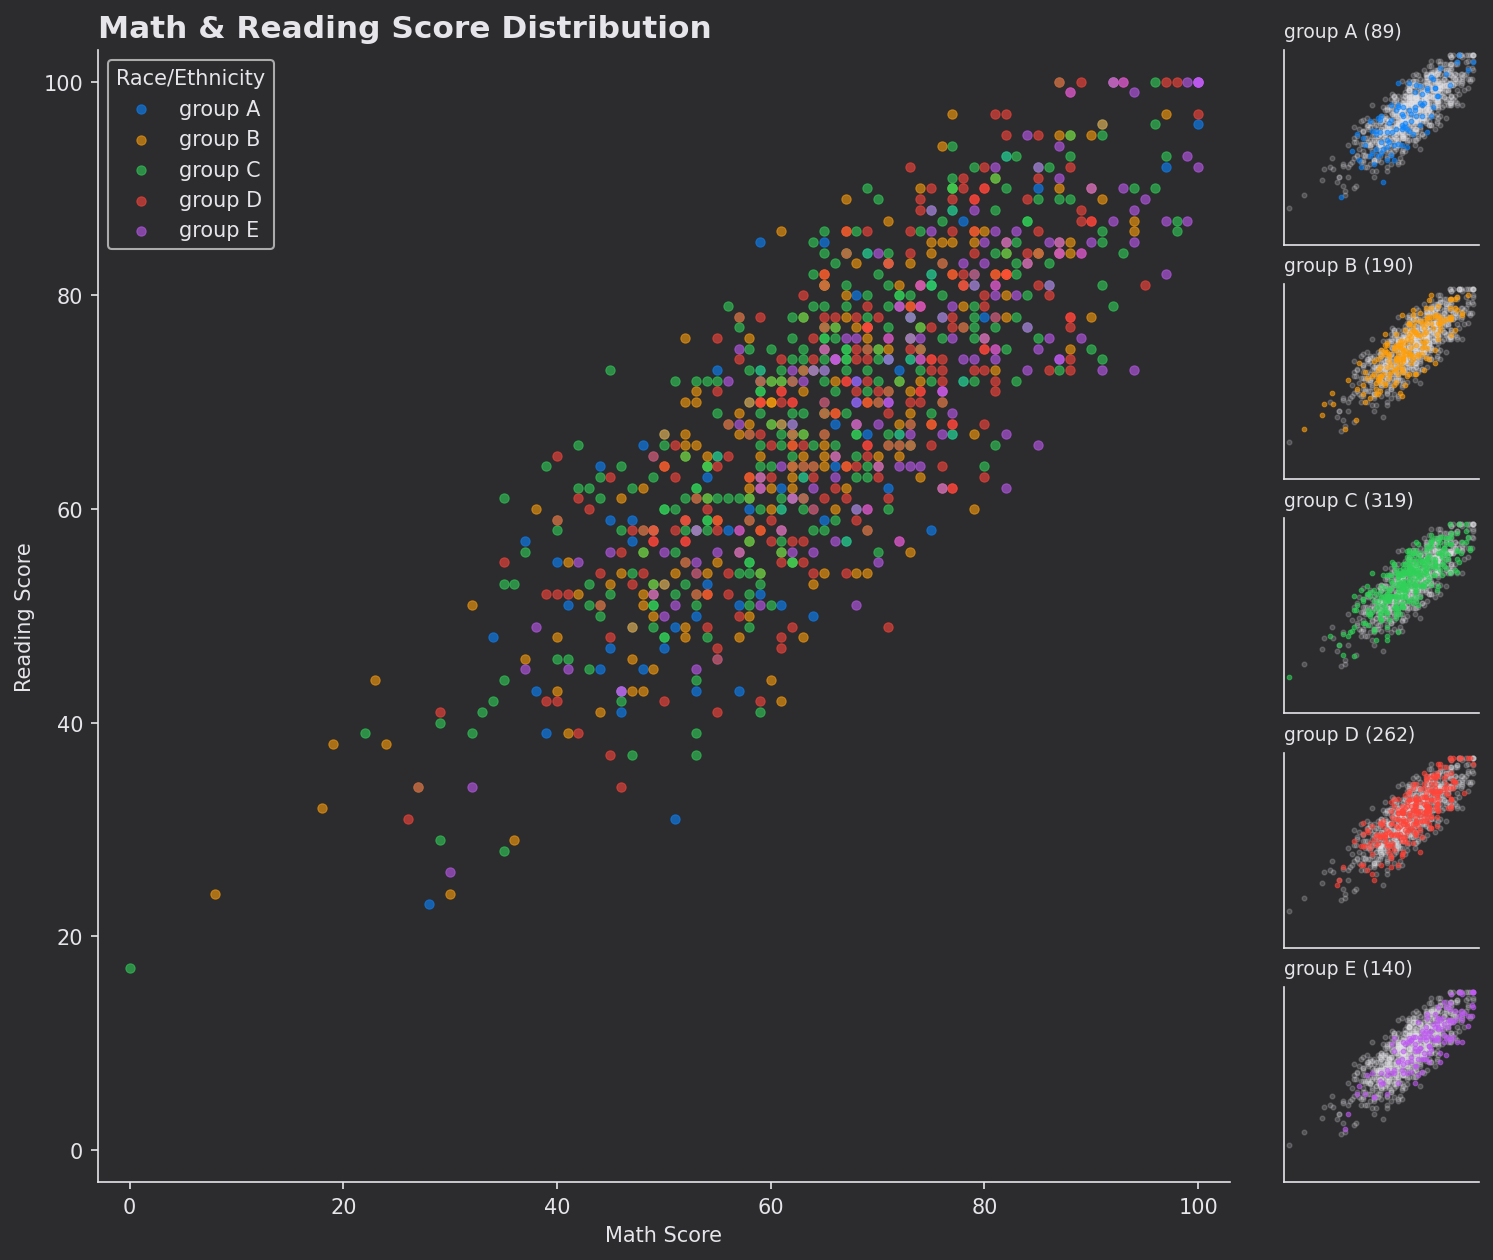

In [14]:
score_distribution('math', 'reading')

KDE plot

In [15]:
def score_distribution_kde(subject):
    fig = plt.figure(figsize=(10, 7))
    gs = fig.add_gridspec(6, 5)
    ax = fig.add_subplot(gs[:5,:])

    sns.kdeplot(x=subject, hue='race/ethnicity', data=student,
                hue_order=sorted(student['race/ethnicity'].unique()),
                bw_adjust=0.4,
                fill=True,ax=ax)
    

    sub_axes = [None] * 5
    for idx, group in enumerate(sorted(student['race/ethnicity'].unique())):
        sub_axes[idx] = fig.add_subplot(gs[5,idx])
        sns.kdeplot(x=subject, data=student,
                    alpha=0.2, 
                  color= white_color,
                  linewidth=0.7, 
                  label=group, fill=True, bw_adjust=0.4,
                  zorder=5, ax=sub_axes[idx]
                  )

        sns.kdeplot(x=subject, data=student[student['race/ethnicity']==group],
                    alpha=0.6, 
                      color= dark_palette[idx],
                      linewidth=0.5, 
                      label=group, fill=True,bw_adjust=0.4,
                      zorder=10, ax=sub_axes[idx]
                  )
        cnt = (student['race/ethnicity']==group).sum()
        sub_axes[idx].set_xticks([])
        sub_axes[idx].set_yticks([])
        sub_axes[idx].set_xlabel('')
        sub_axes[idx].set_ylabel('')

    ax.set_title(subject.capitalize(), loc='left', fontweight='bold', fontsize=13)

    fig.tight_layout()
    plt.show()

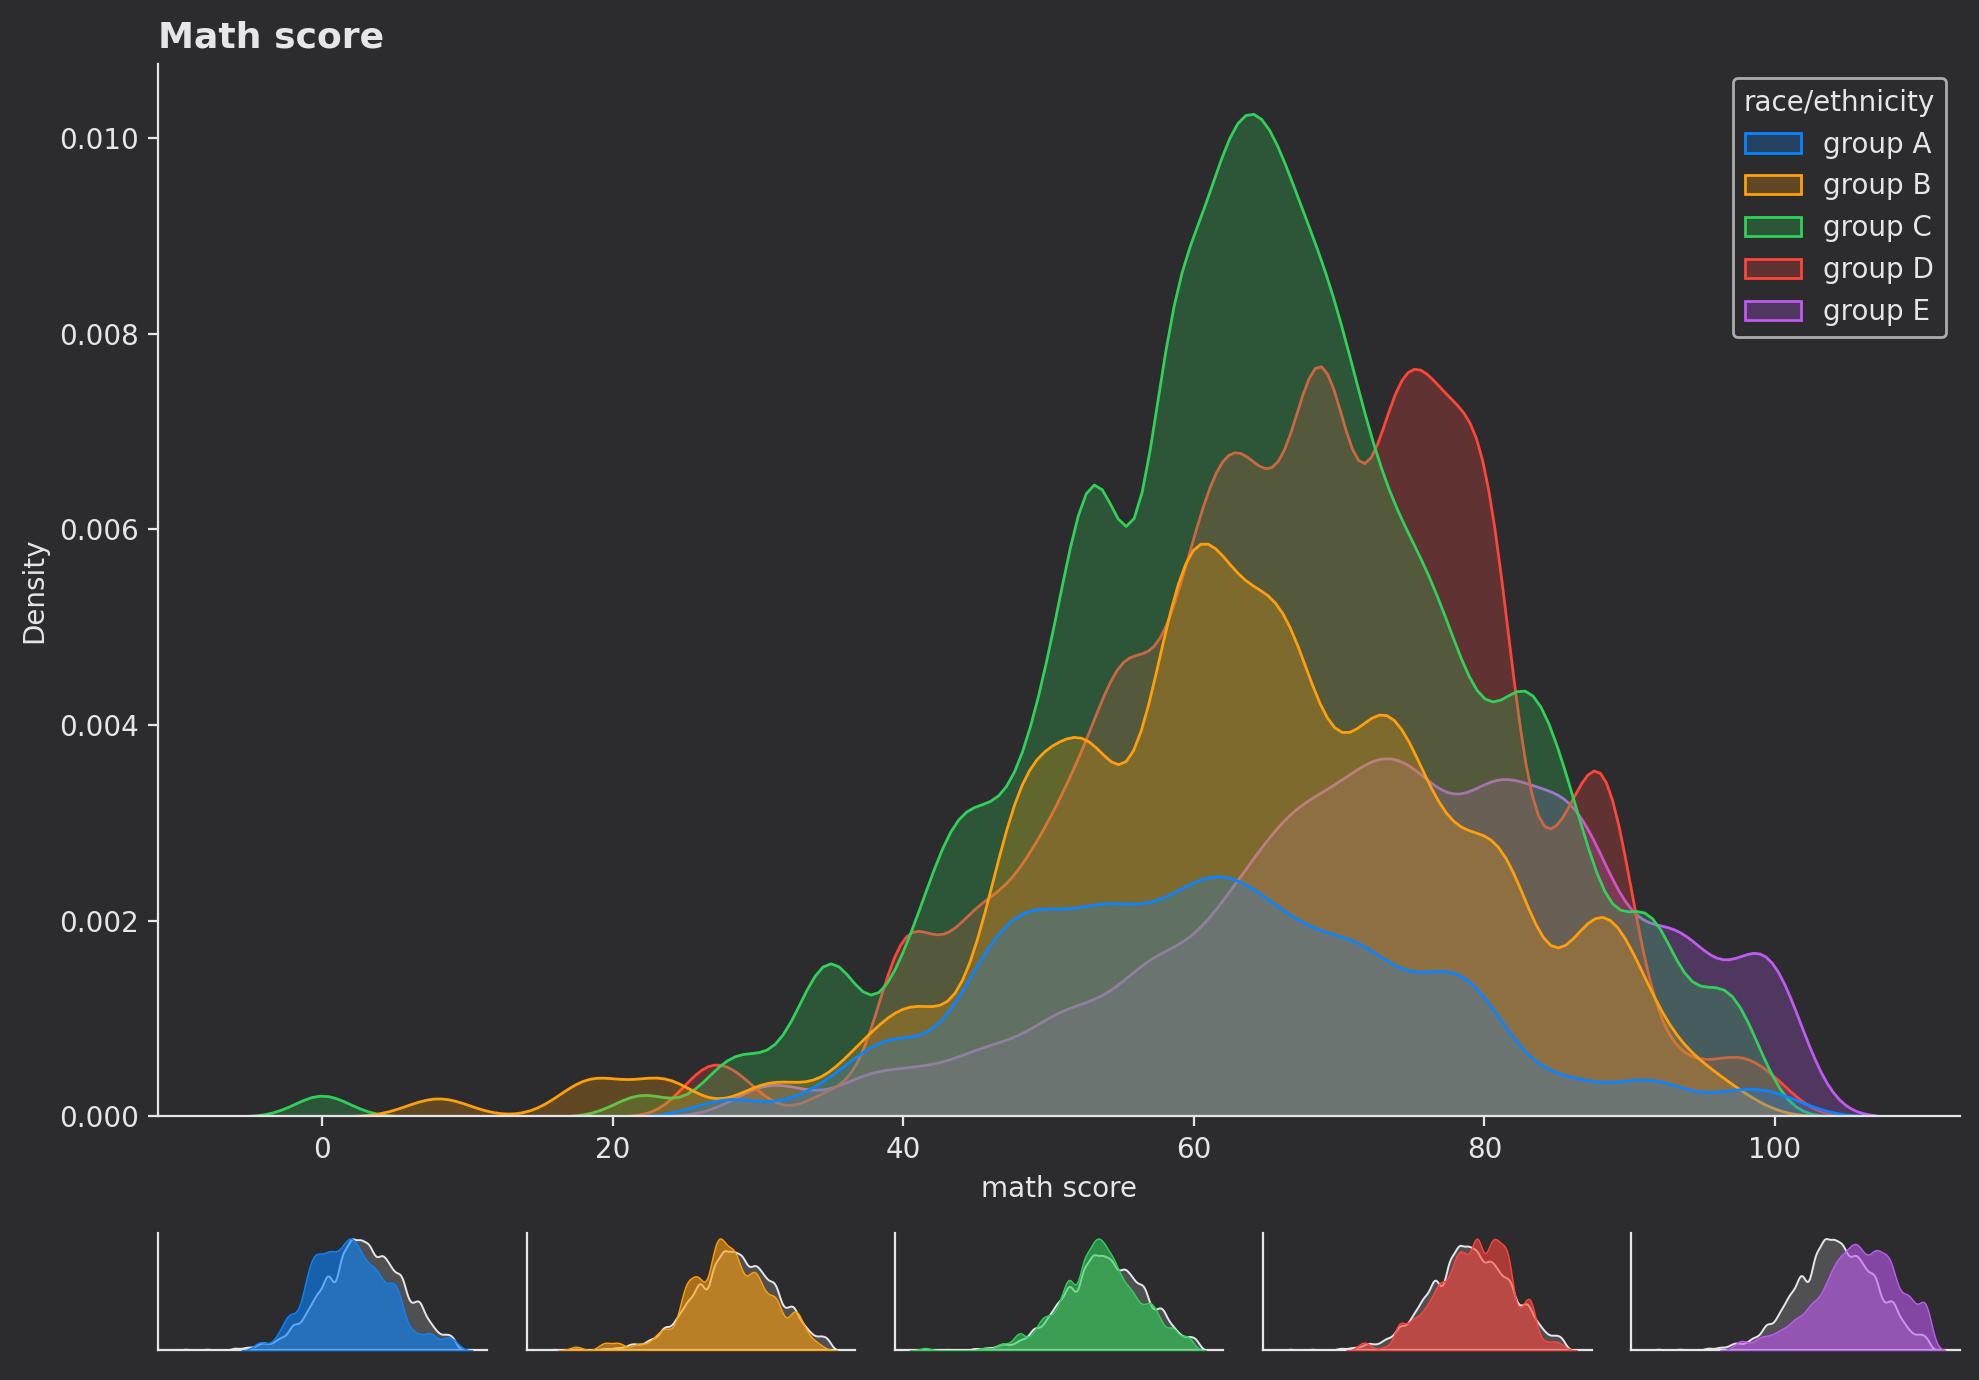

In [16]:
score_distribution_kde('math score')

pairplot

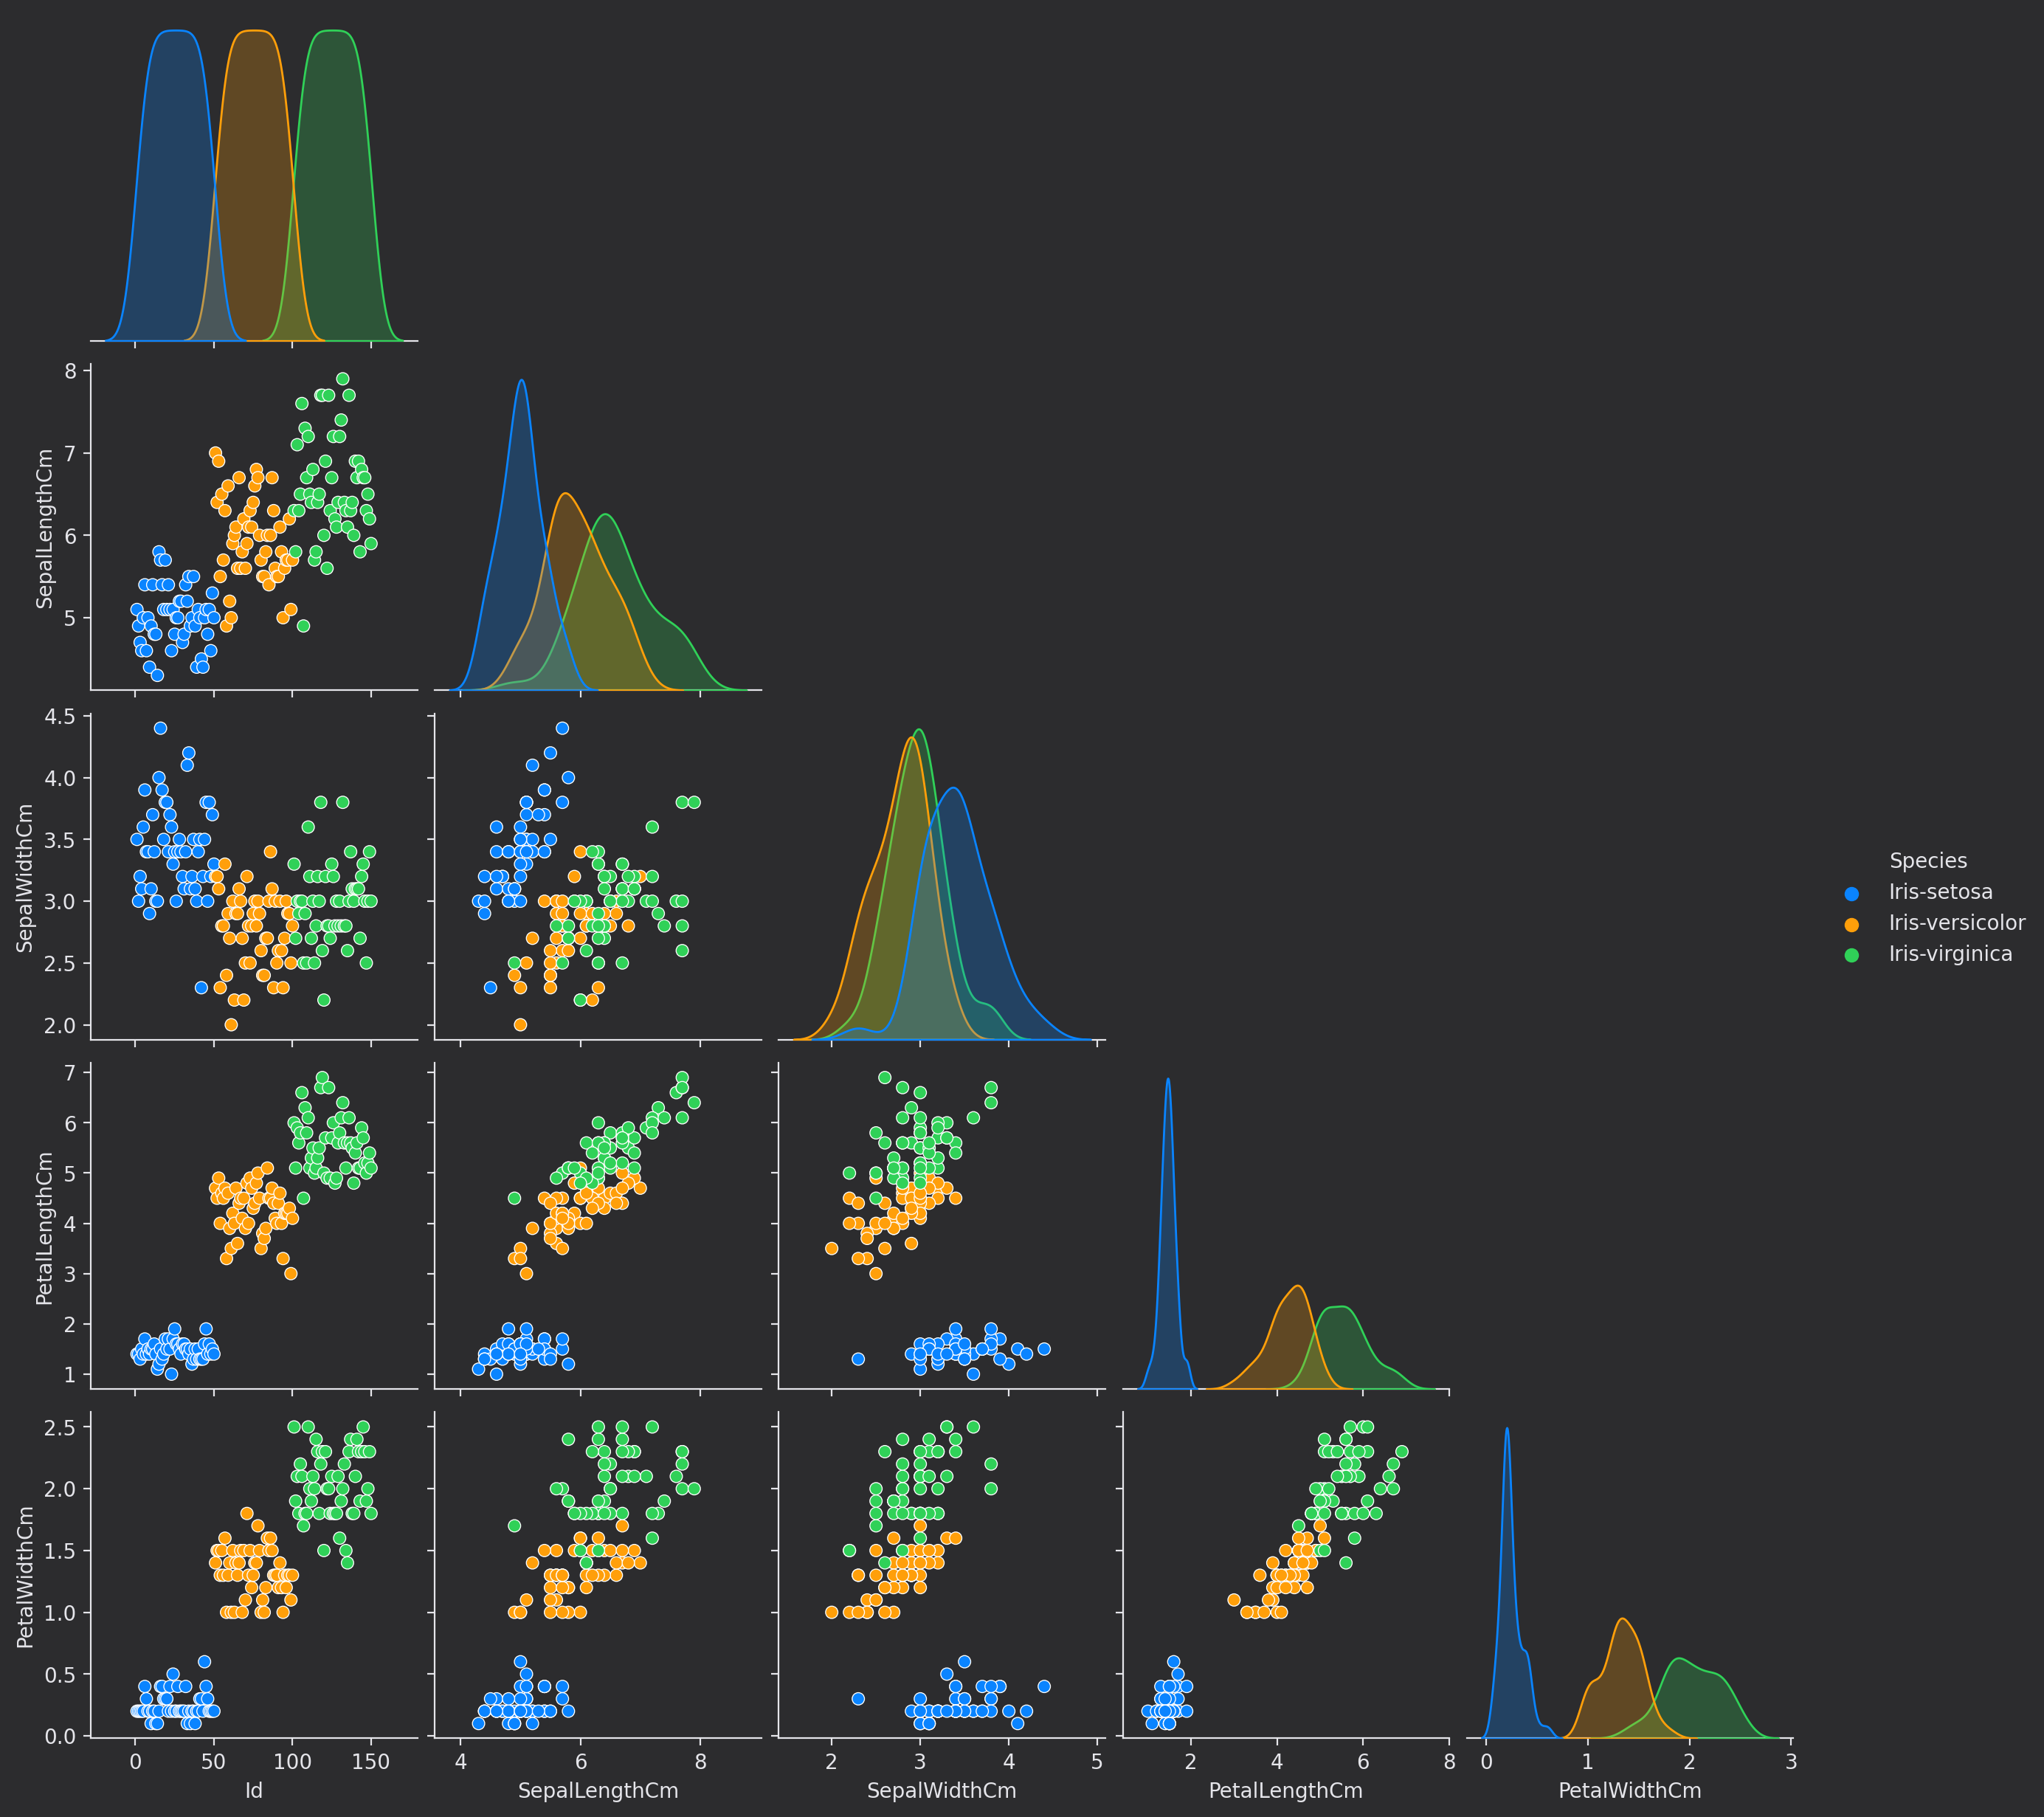

In [17]:
sns.pairplot(iris, hue='Species', corner=True)

plotly 3d plot

In [18]:
import plotly.graph_objects as go

x, y, z = student['math score'], student['reading score'], student['writing score']
gtc = dict(zip(sorted(student['race/ethnicity'].unique()), raw_dark_palette[:5]))
color = student['race/ethnicity'].map(gtc)


fig = go.Figure(data=[go.Scatter3d(
    x=x,
    y=y,
    z=z,
    mode='markers',
    marker=dict(
        size=5,
        color=color,
        opacity=0.8
    )
)], layout=go.Layout(
    plot_bgcolor='rgba(255,0,0,1)',
    paper_bgcolor=f'rgb{raw_gray_dark_palette[-2]}',
    font=dict(color='white'))
)

# tight layout
fig.update_layout(margin=dict(l=0, r=0, b=0, t=0))
fig.update_layout(scene = dict(
                    xaxis_title='MATH',
                    yaxis_title='READING',
                    zaxis_title='WRITING',
    
                    xaxis = dict(
                         gridcolor="white",
                         showbackground=False,
                         zerolinecolor="white",
                        range=[0, 100]
                    ),
                    yaxis = dict(
                        gridcolor="white",
                         showbackground=False,
                        zerolinecolor="white",
                        range=[0, 100]
                    ),
                    zaxis = dict(
                        gridcolor="white",
                         showbackground=False,
                        zerolinecolor="white",
                        range=[0, 100]                    
                    )),
                    margin=dict(
                    r=10, l=10,
                    b=10, t=10)
                  )

camera = dict(
    eye=dict(x=1.4, y=1.4, z=1.4)
)


fig.update_layout(scene_camera=camera)

fig.show()